Opis kolona:

datum_dolaska - datum kada bi gost trebao stići u hotel

datum_kreiranja_rezervacije - datum kada je rezervacija kreirana

datum_odjave - datum kada je gost napustio hotel

datum_otkazivanja_rezervacije - datum kada je rezervacija otkazana

broj_odraslih_gostiju - broj odraslih koji će boraviti u rezerviranim sobama

broj_djece_gostiju - broj djece koji će boraviti u rezerviranim sobama

zemlja_gosta - zemlja iz koje gost dolazi. Kategorije su zapisane u ISO 3155–3:2013 formatu

kanal_prodaje_id - id kanala prodaje preko kojeg je rezervacija napravljena (primjeri: direktna rezervacija, agencija, online)

tip_sobe_id - id tipa sobe koju je gost rezervirao

cijena_nocenja - cijena jednog noćenja za pojedinu rezeraciju

status_rezervacije - status rezervacije (Check-Out, Canceled, No-Show)

rezervacija_id - id rezervacije

gost_id - id gosta

In [19]:
import pandas as pd
import numpy as np
df = pd.read_parquet('train.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  object        
 7   date_from           31634 non-null  object        
 8   date_to             31634 non-null  object        
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   object        
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

In [47]:

df.head()

,reservation_id,night_number,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,year_of_creation,day_of_week_departure,month_of_departure,year_of_departure,week_of_year_arrival,quarter_of_year_arrival,week_of_year_creation,quarter_of_year_creation,week_of_year_departure,quarter_of_year_departure
0,73710,1.0,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,2007,5,12,2007,50,4,48,4,50,4
1,73710,2.0,2007-12-14,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,2007,5,12,2007,50,4,48,4,50,4
2,74464,1.0,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,2007,2,1,2008,1,1,52,4,1,1
3,74461,1.0,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,2007,2,1,2008,1,1,52,4,1,1
4,74466,1.0,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,...,2007,3,1,2008,1,1,52,4,1,1


In [24]:
df['date_from'] = pd.to_datetime(df['date_from'])
df['reservation_date'] = pd.to_datetime(df['reservation_date'])
df['date_to'] = pd.to_datetime(df['date_to'])
df['cancel_date'] = pd.to_datetime(df['cancel_date'], errors='coerce')

df['day_of_week_arrival'] = df['date_from'].dt.dayofweek
df['month_of_arrival'] = df['date_from'].dt.month
df['year_of_arrival'] = df['date_from'].dt.year

df['day_of_week_creation'] = df['reservation_date'].dt.dayofweek
df['month_of_creation'] = df['reservation_date'].dt.month
df['year_of_creation'] = df['reservation_date'].dt.year

df['day_of_week_departure'] = df['date_to'].dt.dayofweek
df['month_of_departure'] = df['date_to'].dt.month
df['year_of_departure'] = df['date_to'].dt.year

df['cancel_date'] = df['cancel_date'].fillna(pd.NaT)

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 

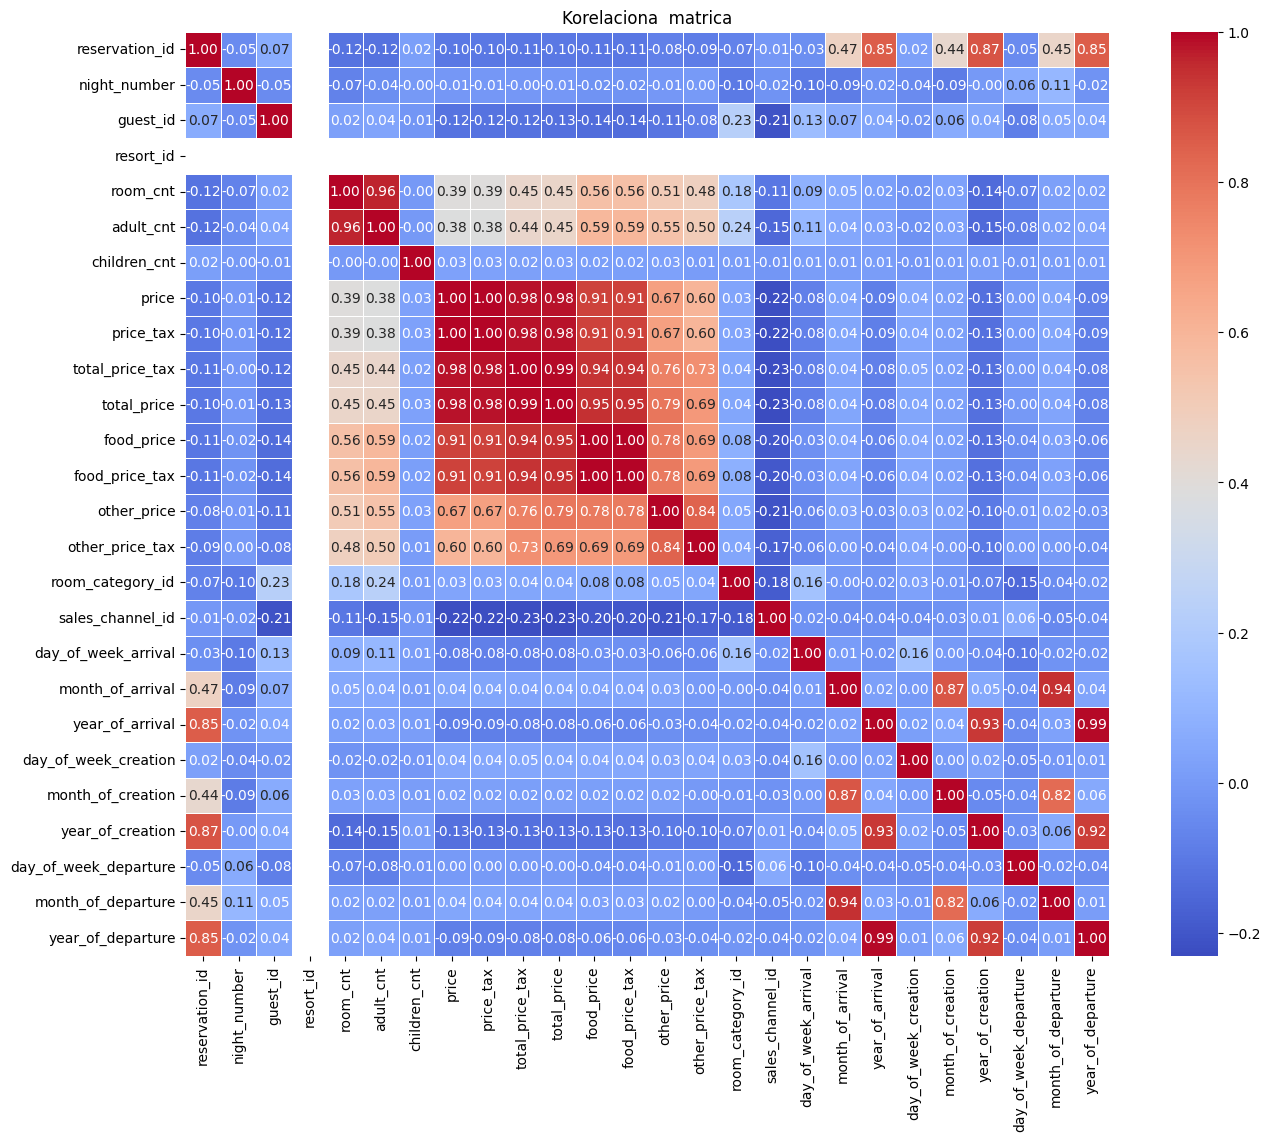

In [25]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Korelaciona  matrica")
plt.show()

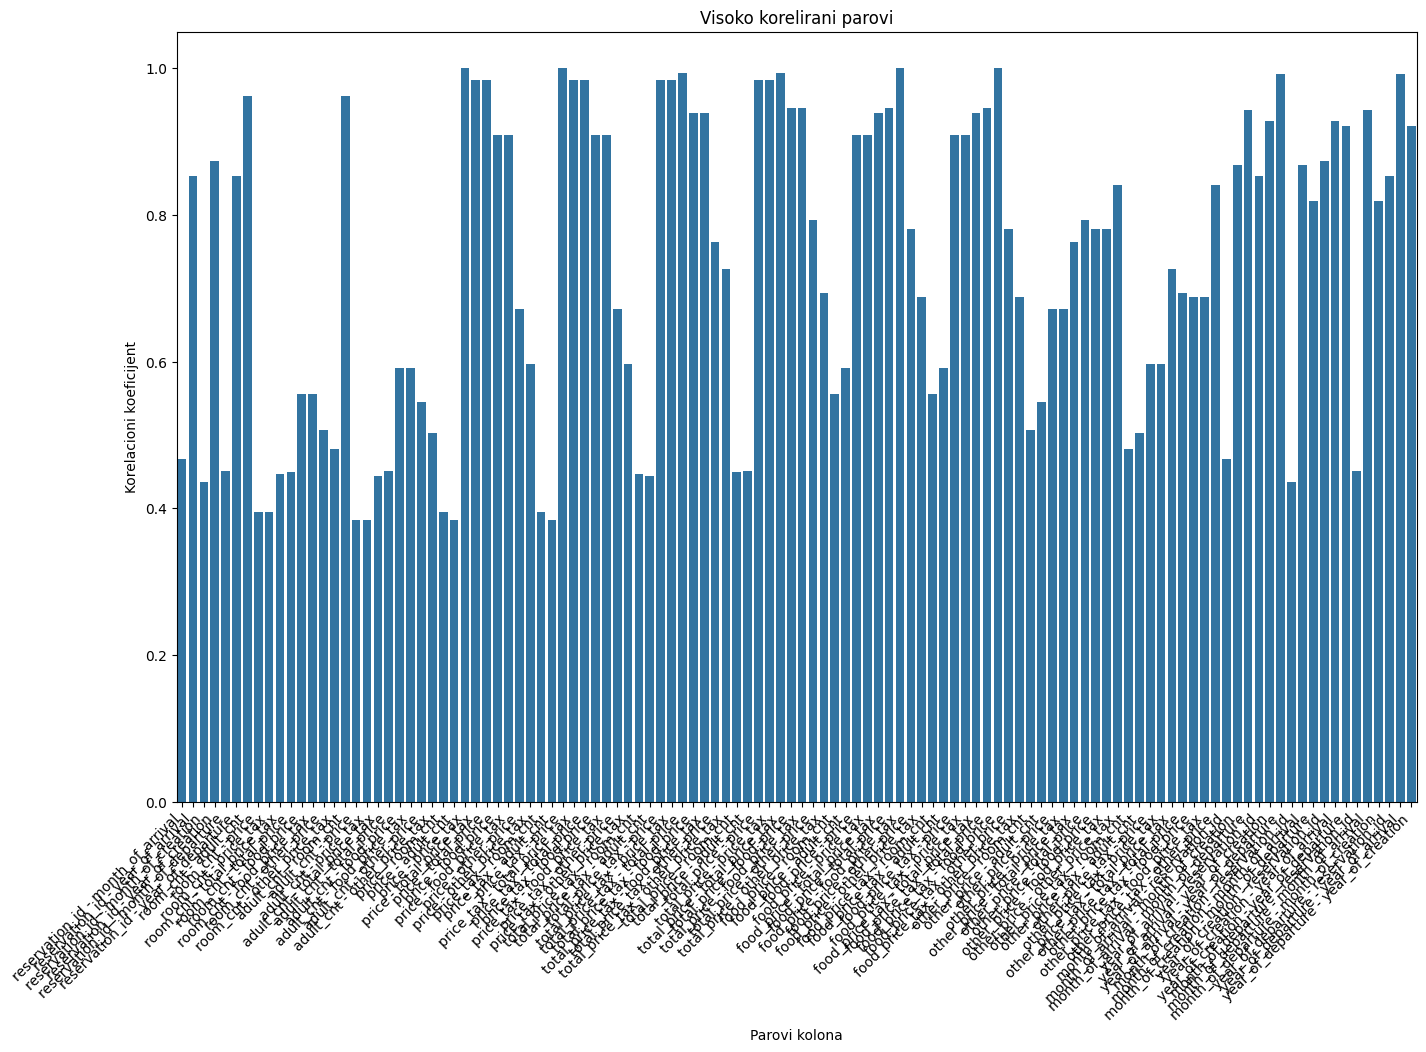

In [29]:
highly_correlated_cols = (corr.abs() > 0.25).stack()
highly_correlated_pairs = highly_correlated_cols[highly_correlated_cols].index


non_redundant_pairs = [pair for pair in highly_correlated_pairs if pair[0] != pair[1]]

plt.figure(figsize=(16,10))
sns.barplot(x=[f'{pair[0]} - {pair[1]}' for pair in non_redundant_pairs], y=[corr.loc[pair] for pair in non_redundant_pairs])
plt.title("Visoko korelirani parovi")
plt.xlabel("Parovi kolona")
plt.ylabel("Korelacioni koeficijent")
plt.xticks(rotation=45, ha='right') 
plt.show()

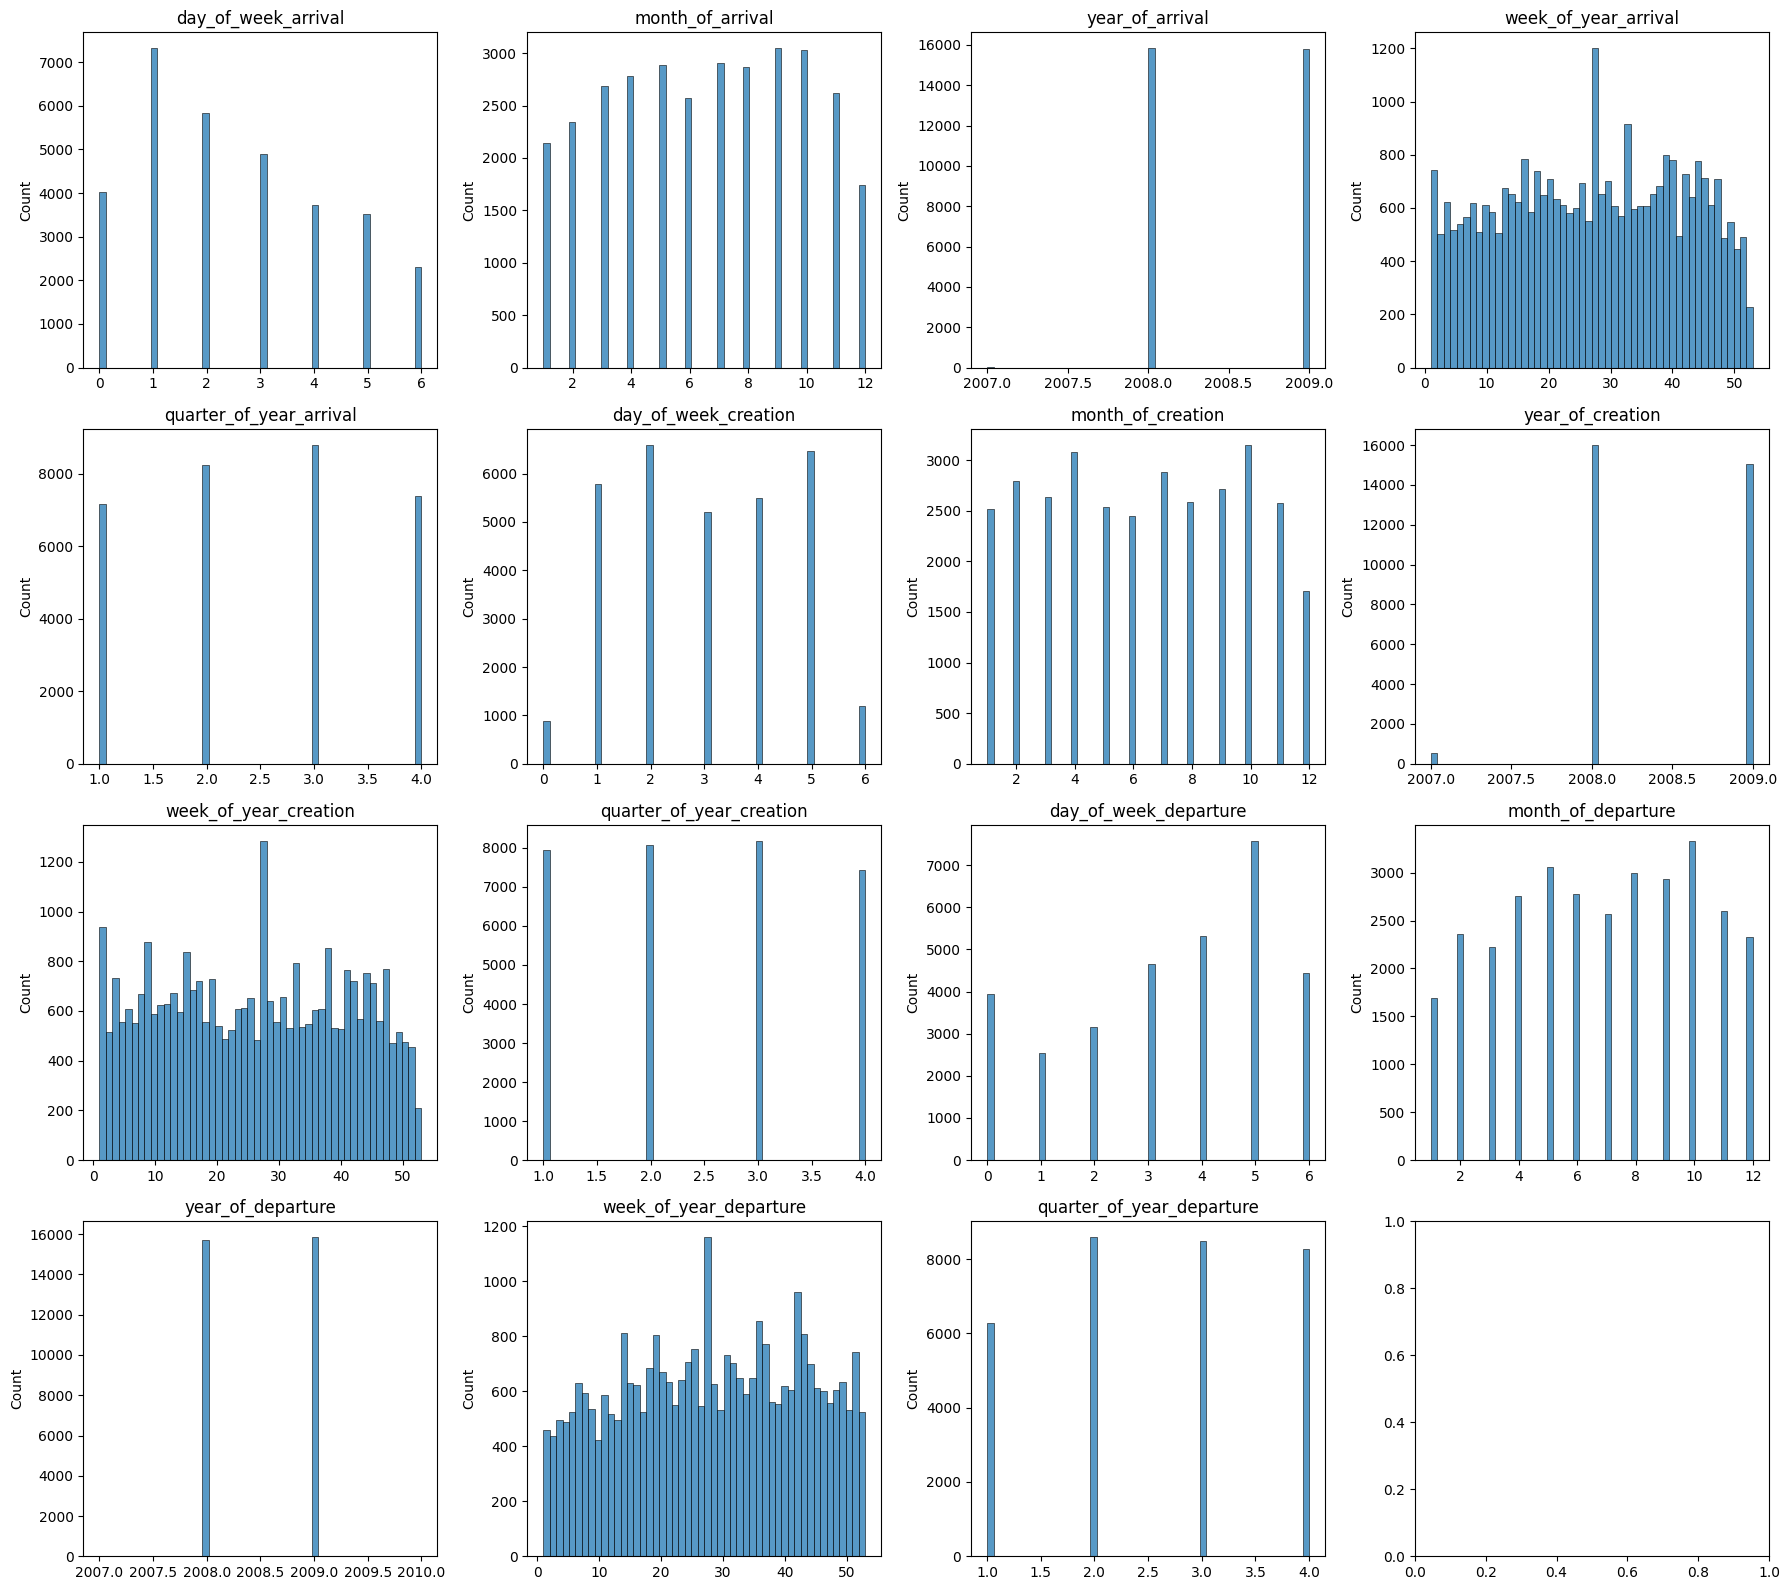

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure date columns are in datetime format
df['stay_date'] = pd.to_datetime(df['stay_date'])
df['reservation_date'] = pd.to_datetime(df['reservation_date'])
df['date_from'] = pd.to_datetime(df['date_from'])
df['date_to'] = pd.to_datetime(df['date_to'])

# Create time-based features
df['week_of_year_arrival'] = df['date_from'].dt.isocalendar().week
df['quarter_of_year_arrival'] = df['date_from'].dt.quarter

df['week_of_year_creation'] = df['reservation_date'].dt.isocalendar().week
df['quarter_of_year_creation'] = df['reservation_date'].dt.quarter

df['week_of_year_departure'] = df['date_to'].dt.isocalendar().week
df['quarter_of_year_departure'] = df['date_to'].dt.quarter

# Assuming you also want to add day, month, and year
df['day_of_week_arrival'] = df['date_from'].dt.dayofweek
df['month_of_arrival'] = df['date_from'].dt.month
df['year_of_arrival'] = df['date_from'].dt.year

df['day_of_week_creation'] = df['reservation_date'].dt.dayofweek
df['month_of_creation'] = df['reservation_date'].dt.month
df['year_of_creation'] = df['reservation_date'].dt.year

df['day_of_week_departure'] = df['date_to'].dt.dayofweek
df['month_of_departure'] = df['date_to'].dt.month
df['year_of_departure'] = df['date_to'].dt.year

# Define columns to plot
columns_to_plot = [
    'day_of_week_arrival', 'month_of_arrival', 'year_of_arrival',
    'week_of_year_arrival', 'quarter_of_year_arrival',
    
    'day_of_week_creation', 'month_of_creation', 'year_of_creation',
    'week_of_year_creation', 'quarter_of_year_creation',
    
    'day_of_week_departure', 'month_of_departure', 'year_of_departure',
    'week_of_year_departure', 'quarter_of_year_departure'
]

# Plotting the distribution of each column
num_subplots = len(columns_to_plot)

fig, axes = plt.subplots(nrows=num_subplots // 4 + 1, ncols=4, figsize=(18, 4 * (num_subplots // 4 + 1)))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if i < num_subplots:
        sns.histplot(df[column], kde=False, ax=axes[i], bins=50)
        axes[i].set_title(column)
        axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


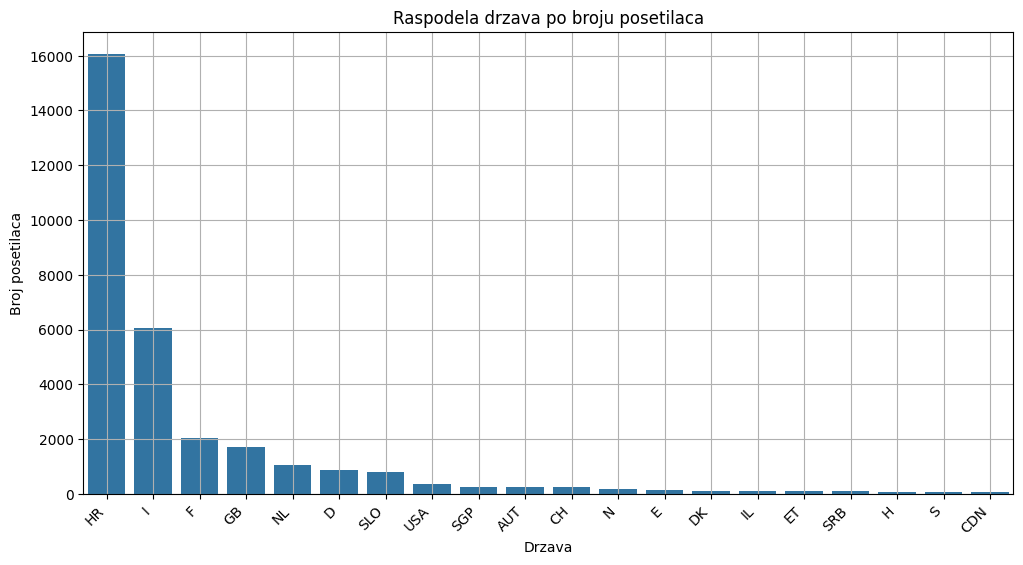

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume guest_country_id represents the country codes and you have loaded the dataset as df
# If you have a mapping of country IDs to country names, you would join or map them here
# For now, I'll proceed with using the IDs directly

# Get the top 20 countries by guest count
top_countries = df['guest_country_id'].value_counts().nlargest(20).index

# Filter the DataFrame to include only entries from the top countries
df_top_countries = df[df['guest_country_id'].isin(top_countries)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='guest_country_id', data=df_top_countries, order=top_countries)
plt.title('Raspodela drzava po broju posetilaca')  # Distribution of countries by number of visitors
plt.xlabel('Drzava')  # Country
plt.ylabel('Broj posetilaca')  # Number of Visitors
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


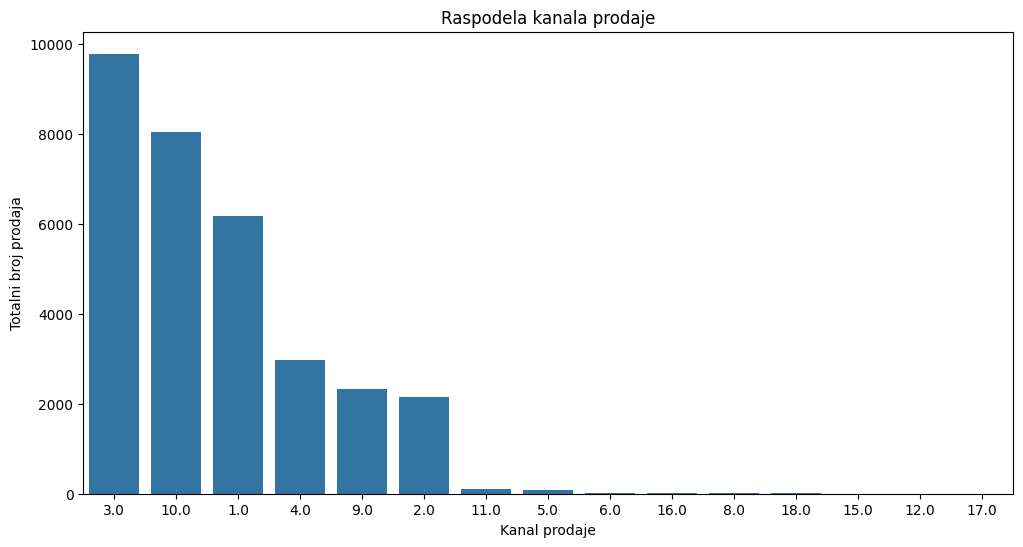

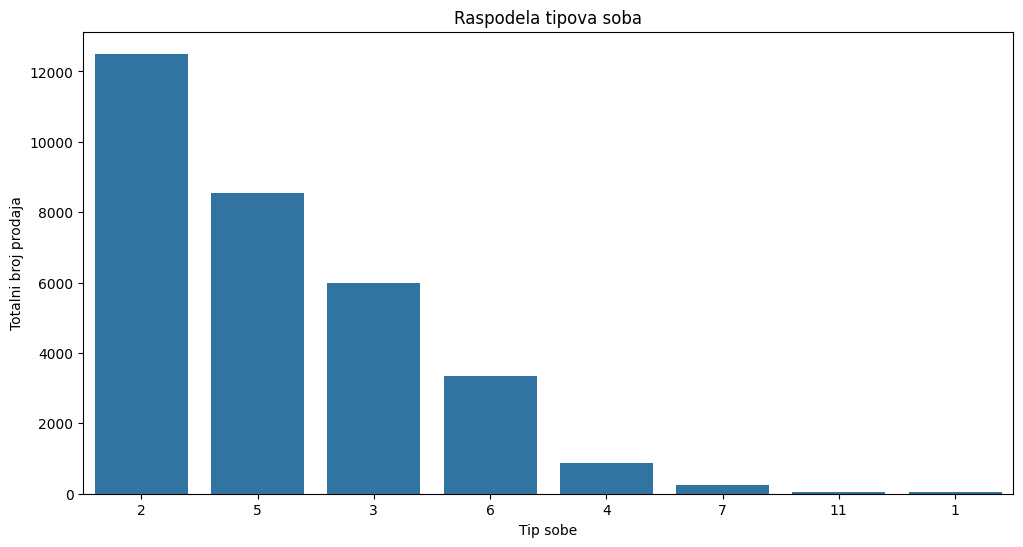

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sales_channel_id', data=df, order=df['sales_channel_id'].value_counts().index)
plt.title('Raspodela kanala prodaje')
plt.xlabel('Kanal prodaje')
plt.ylabel('Totalni broj prodaja')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='room_category_id', data=df, order=df['room_category_id'].value_counts().index)
plt.title('Raspodela tipova soba')
plt.xlabel('Tip sobe')
plt.ylabel('Totalni broj prodaja')
plt.show()

##nastavak sutra##

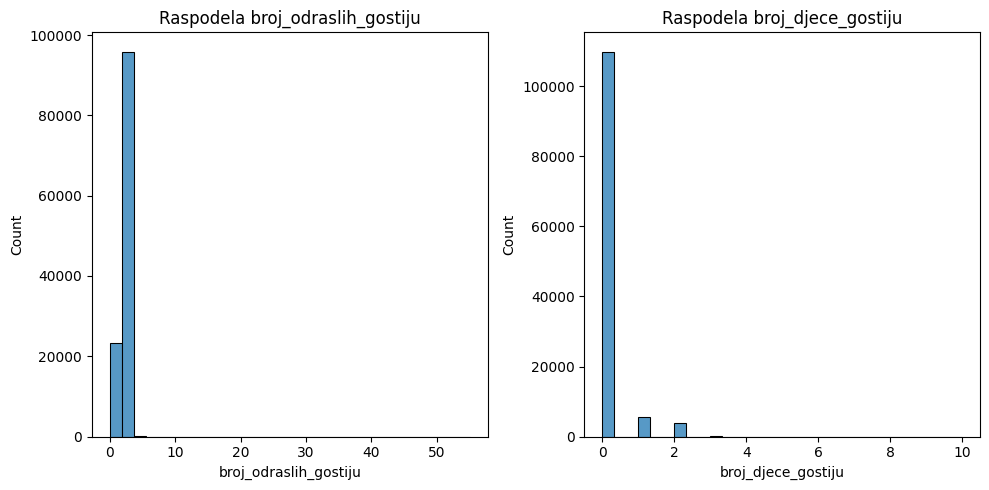

In [20]:
plt.figure(figsize=(10, 5))

def remove_outliers(column): # ovo nisam koristio na kraju
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

plt.subplot(1, 2, 1)
sns.histplot(df['broj_odraslih_gostiju'], bins=30)
plt.title('Raspodela broj_odraslih_gostiju')
plt.xlabel('broj_odraslih_gostiju')

plt.subplot(1, 2, 2)
sns.histplot(df['broj_djece_gostiju'], bins=30)
plt.title('Raspodela broj_djece_gostiju')
plt.xlabel('broj_djece_gostiju')

plt.tight_layout()
plt.show()

Aritm sredina cene: 123.12
Medijana cena: 109.45
Stdev cena: 62.06

Summary for za cene u odnosu na svaku vrstu sobe:
               count        mean         std        min         25%  \
tip_sobe_id                                                           
0              931.0  198.712228  102.503868  40.093734  116.148908   
1            85872.0  110.599261   48.113705  40.003037   76.752011   
2            19179.0  142.494948   65.054556  40.041848   97.476932   
3             6519.0  152.677920   81.763739  40.009442   95.236486   
4             2092.0  211.028670  108.886598  40.816341  126.869832   
5             2894.0  194.992660   85.885496  40.174034  134.074940   
6              601.0  226.973956  117.232577  41.559402  138.334086   
7                6.0  142.490204   44.095406  78.718880  118.571035   
8             1115.0  110.894707   42.184892  41.237390   81.782301   

                    50%         75%         max  
tip_sobe_id                                      


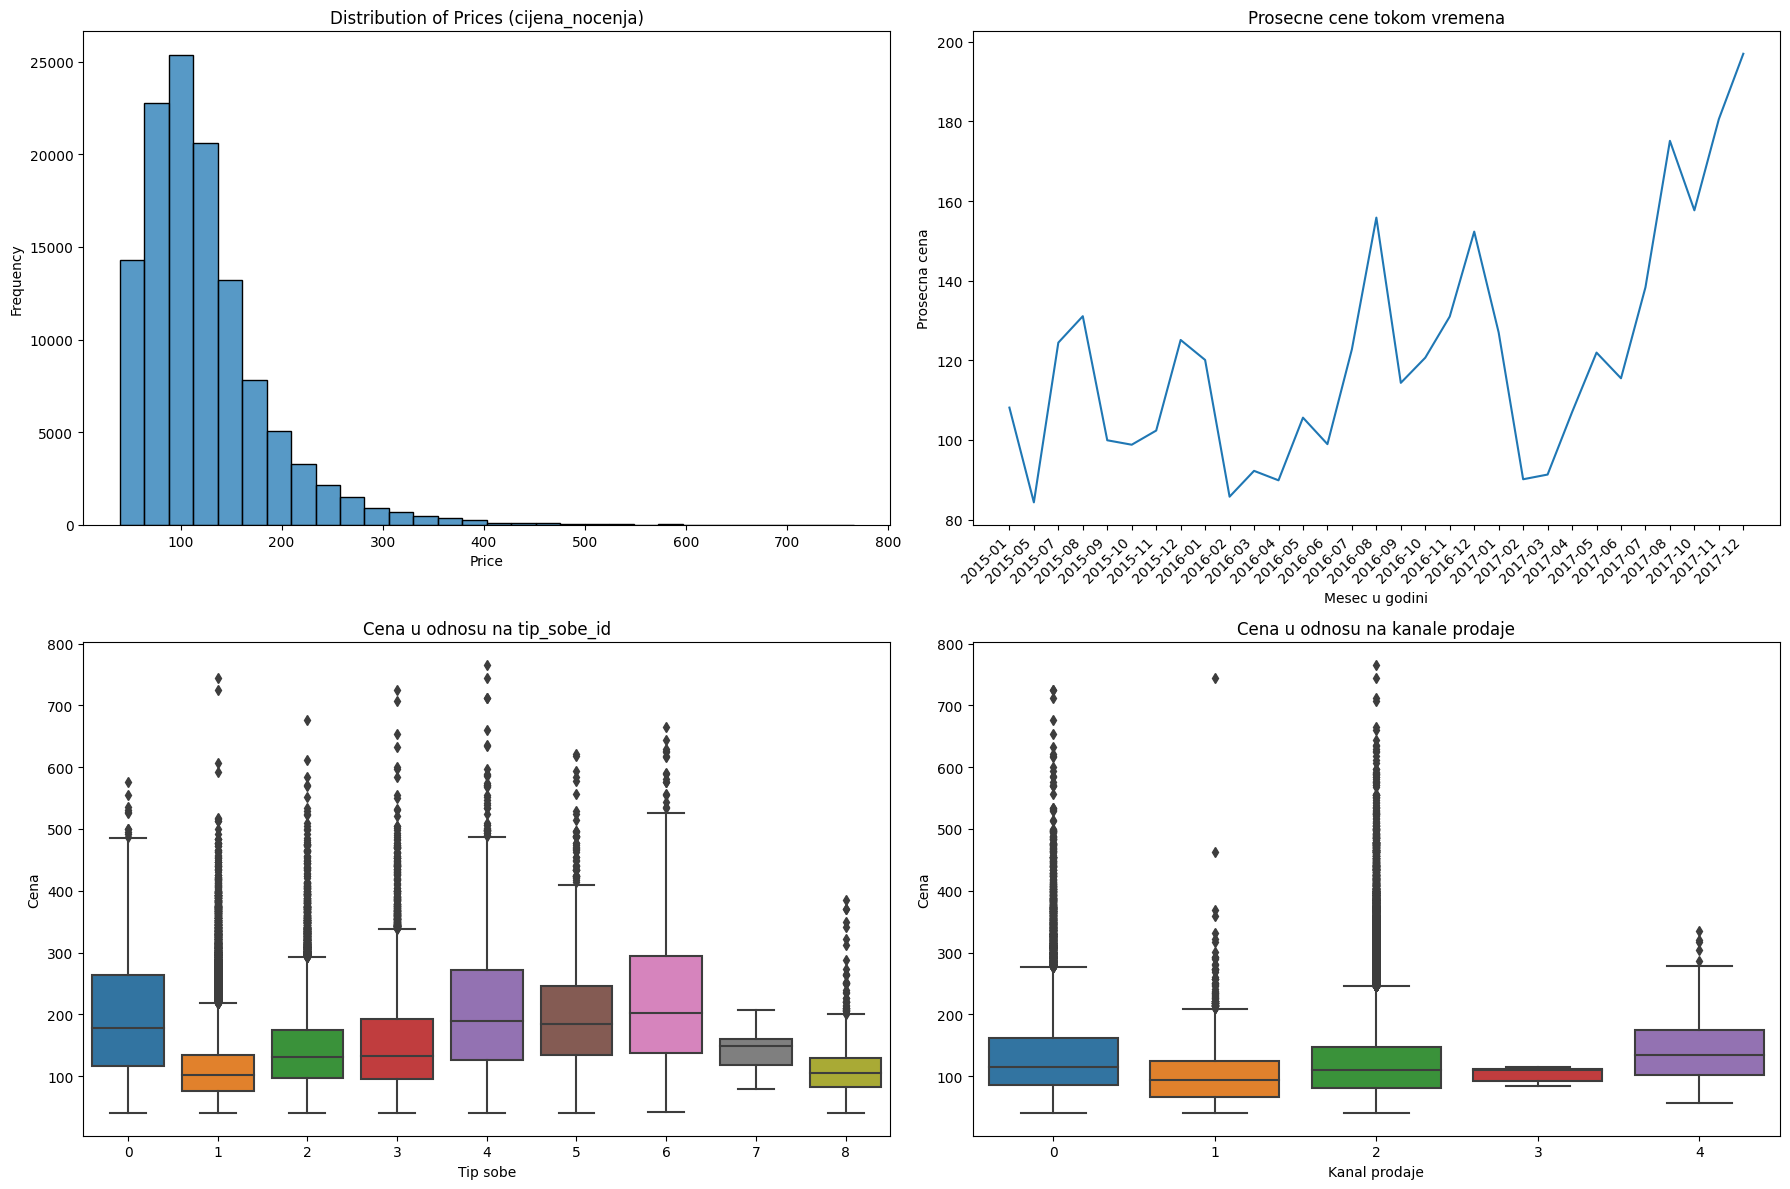

In [21]:
df= df[df['cijena_nocenja'] <= 7000] # ovo je kako bih sklonio taj jedan autlajer koji zajebe svaki grafik

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['cijena_nocenja'], bins=30)
plt.title('Distribution of Prices (cijena_nocenja)')
plt.xlabel('Price')
plt.ylabel('Frequency')

mean_price = df['cijena_nocenja'].mean()
median_price = df['cijena_nocenja'].median()
std_dev_price = df['cijena_nocenja'].std()

print(f"Aritm sredina cene: {mean_price:.2f}")
print(f"Medijana cena: {median_price:.2f}")
print(f"Stdev cena: {std_dev_price:.2f}")


plt.subplot(2, 2, 2)
df['month_year'] = df['datum_dolaska'].dt.to_period('M')
average_prices_over_time = df.groupby('month_year')['cijena_nocenja'].mean()
sns.lineplot(x=average_prices_over_time.index.astype(str), y=average_prices_over_time.values)
plt.title('Prosecne cene tokom vremena')
plt.xlabel('Mesec u godini')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Prosecna cena')


plt.subplot(2, 2, 3)
sns.boxplot(x='tip_sobe_id', y='cijena_nocenja', data=df)
plt.title('Cena u odnosu na tip_sobe_id')
plt.xlabel('Tip sobe')
plt.ylabel('Cena')

room_type_stats = df.groupby('tip_sobe_id')['cijena_nocenja'].describe()
print("\nSummary for za cene u odnosu na svaku vrstu sobe:")
print(room_type_stats)

plt.subplot(2, 2, 4)
sns.boxplot(x='kanal_prodaje_id', y='cijena_nocenja', data=df)
plt.title('Cena u odnosu na kanale prodaje')
plt.xlabel('Kanal prodaje')
plt.ylabel('Cena')

channel_avg_prices = df.groupby('kanal_prodaje_id')['cijena_nocenja'].mean()
print("\n Prosecne cene u odnosu na razlicite kanale prodaje")
print(channel_avg_prices)

plt.tight_layout()
plt.show()

Aritmeticka sredina duzine rezervacija: 3.43 dana
Medijana duzine rezervacija: 3.00 dana
Stdev duzine rezervacija: 2.54 dana


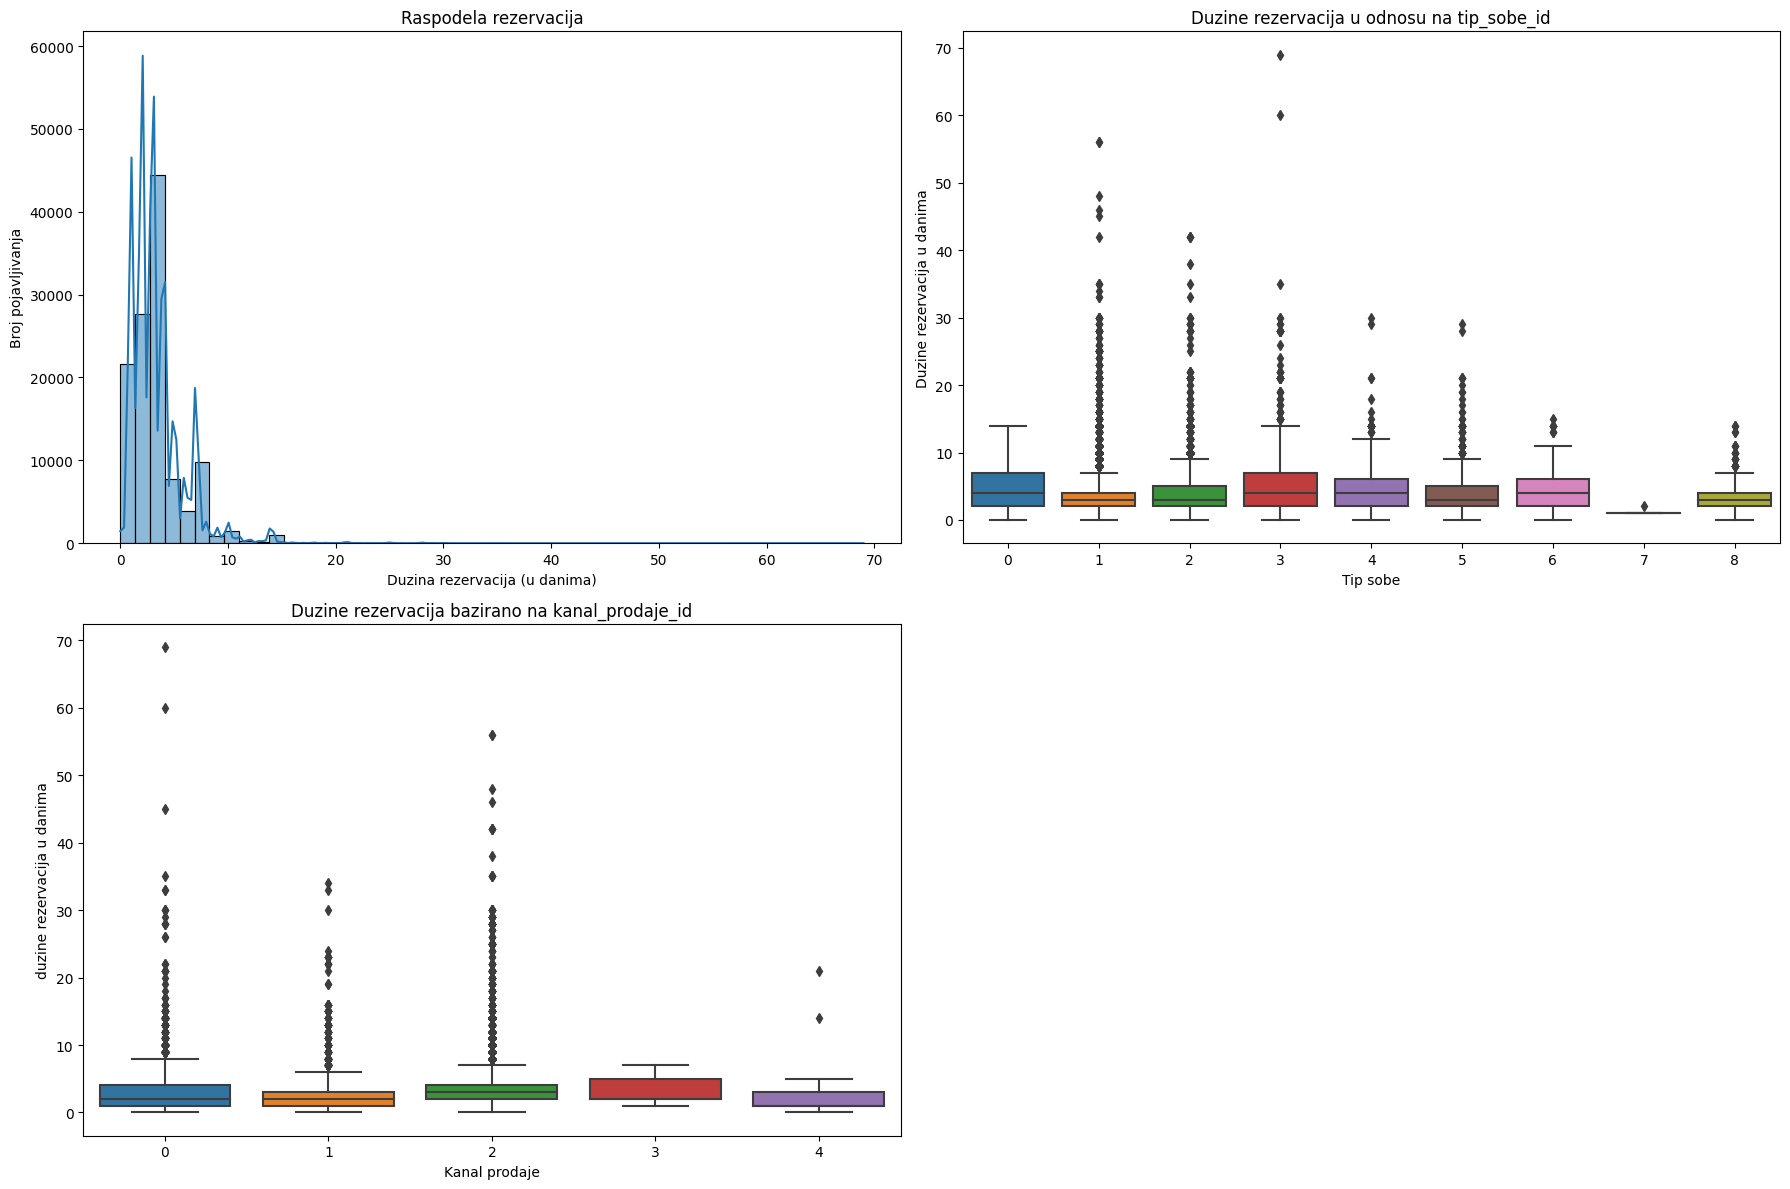

In [22]:
df_filtered['booking_duration'] = (df_filtered['datum_odjave'] - df_filtered['datum_dolaska']).dt.days

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(df_filtered['booking_duration'], kde=True, bins=50)
plt.title('Raspodela rezervacija')
plt.xlabel('Duzina rezervacija (u danima)')
plt.ylabel('Broj pojavljivanja')

mean_duration = df_filtered['booking_duration'].mean()
median_duration = df_filtered['booking_duration'].median()
std_dev_duration = df_filtered['booking_duration'].std()

print(f"Aritmeticka sredina duzine rezervacija: {mean_duration:.2f} dana")
print(f"Medijana duzine rezervacija: {median_duration:.2f} dana")
print(f"Stdev duzine rezervacija: {std_dev_duration:.2f} dana")

plt.subplot(2, 2, 2)
sns.boxplot(x='tip_sobe_id', y='booking_duration', data=df_filtered)
plt.title('Duzine rezervacija u odnosu na tip_sobe_id')
plt.xlabel('Tip sobe')
plt.ylabel('Duzine rezervacija u danima')

plt.subplot(2, 2, 3)
sns.boxplot(x='kanal_prodaje_id', y='booking_duration', data=df_filtered)
plt.title('Duzine rezervacija bazirano na kanal_prodaje_id')
plt.xlabel('Kanal prodaje')
plt.ylabel('duzine rezervacija u danima')

plt.tight_layout()
plt.show()

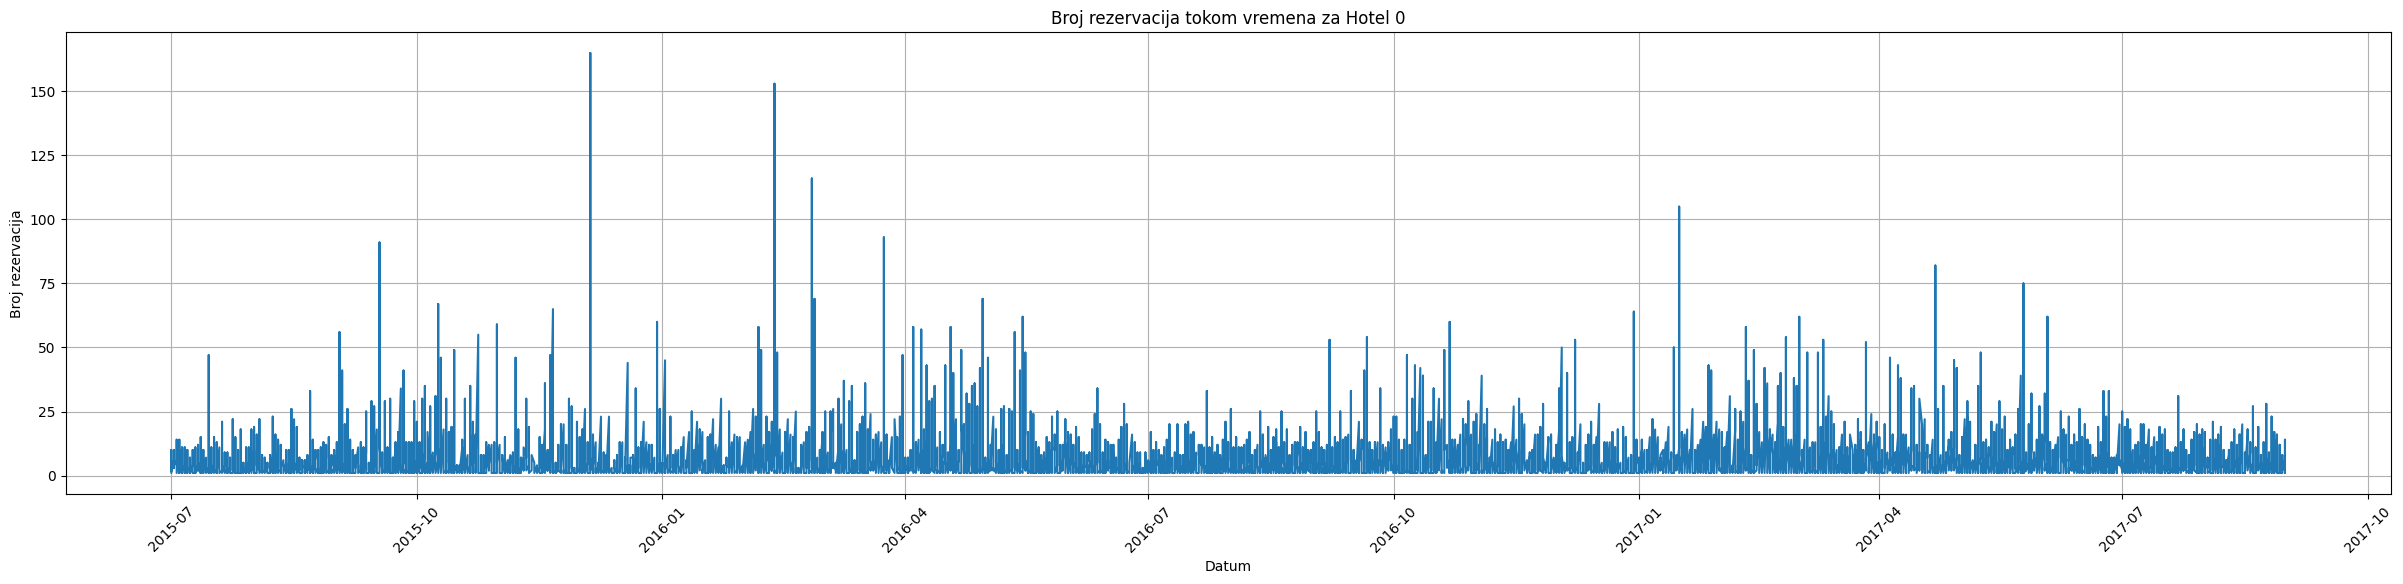

In [24]:
grouped_data = df.groupby(['hotel_id', 'datum_dolaska', 'datum_odjave']).size().reset_index(name='num_reservations')

example_hotel_id = 0
example_hotel_data = grouped_data[grouped_data['hotel_id'] == example_hotel_id]

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.plot(example_hotel_data['datum_dolaska'], example_hotel_data['num_reservations'])
plt.title(f'Broj rezervacija tokom vremena za Hotel {example_hotel_id}')
plt.xlabel('Datum')
plt.ylabel('Broj rezervacija')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
def visualize_reservations_by_time(df, hotel_id):
    
    agg_data_day = df[df['hotel_id'] == hotel_id].groupby([pd.Grouper(key='datum_dolaska', freq='D')]).size().reset_index(name='num_reservations')
    agg_data_week = df[df['hotel_id'] == hotel_id].groupby([pd.Grouper(key='datum_dolaska', freq='W-Mon')]).size().reset_index(name='num_reservations')
    agg_data_month = df[df['hotel_id'] == hotel_id].groupby([pd.Grouper(key='datum_dolaska', freq='M')]).size().reset_index(name='num_reservations')
    agg_data_year = df[df['hotel_id'] == hotel_id].groupby([pd.Grouper(key='datum_dolaska', freq='Y')]).size().reset_index(name='num_reservations')

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(agg_data_day['datum_dolaska'], agg_data_day['num_reservations'])
    plt.title(f'Dnevne rezervacije za Hotel {hotel_id}')
    plt.xlabel('Datum')
    plt.ylabel('Broj rezervacija')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(agg_data_week['datum_dolaska'], agg_data_week['num_reservations'])
    plt.title(f'Nedeljne rezervacije za Hotel {hotel_id}')
    plt.xlabel('Datum')
    plt.ylabel('Broj rezervacija')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(agg_data_month['datum_dolaska'], agg_data_month['num_reservations'], marker='o')
    plt.title(f'Mesecne rezervacije za Hotel {hotel_id}')
    plt.xlabel('Datum')
    plt.ylabel('Broj rezervacija')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(agg_data_year['datum_dolaska'], agg_data_year['num_reservations'], marker='o')
    plt.title(f'Godisnje rezervacije za Hotel {hotel_id}')
    plt.xlabel('Datum')
    plt.ylabel('Broj rezervacija')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

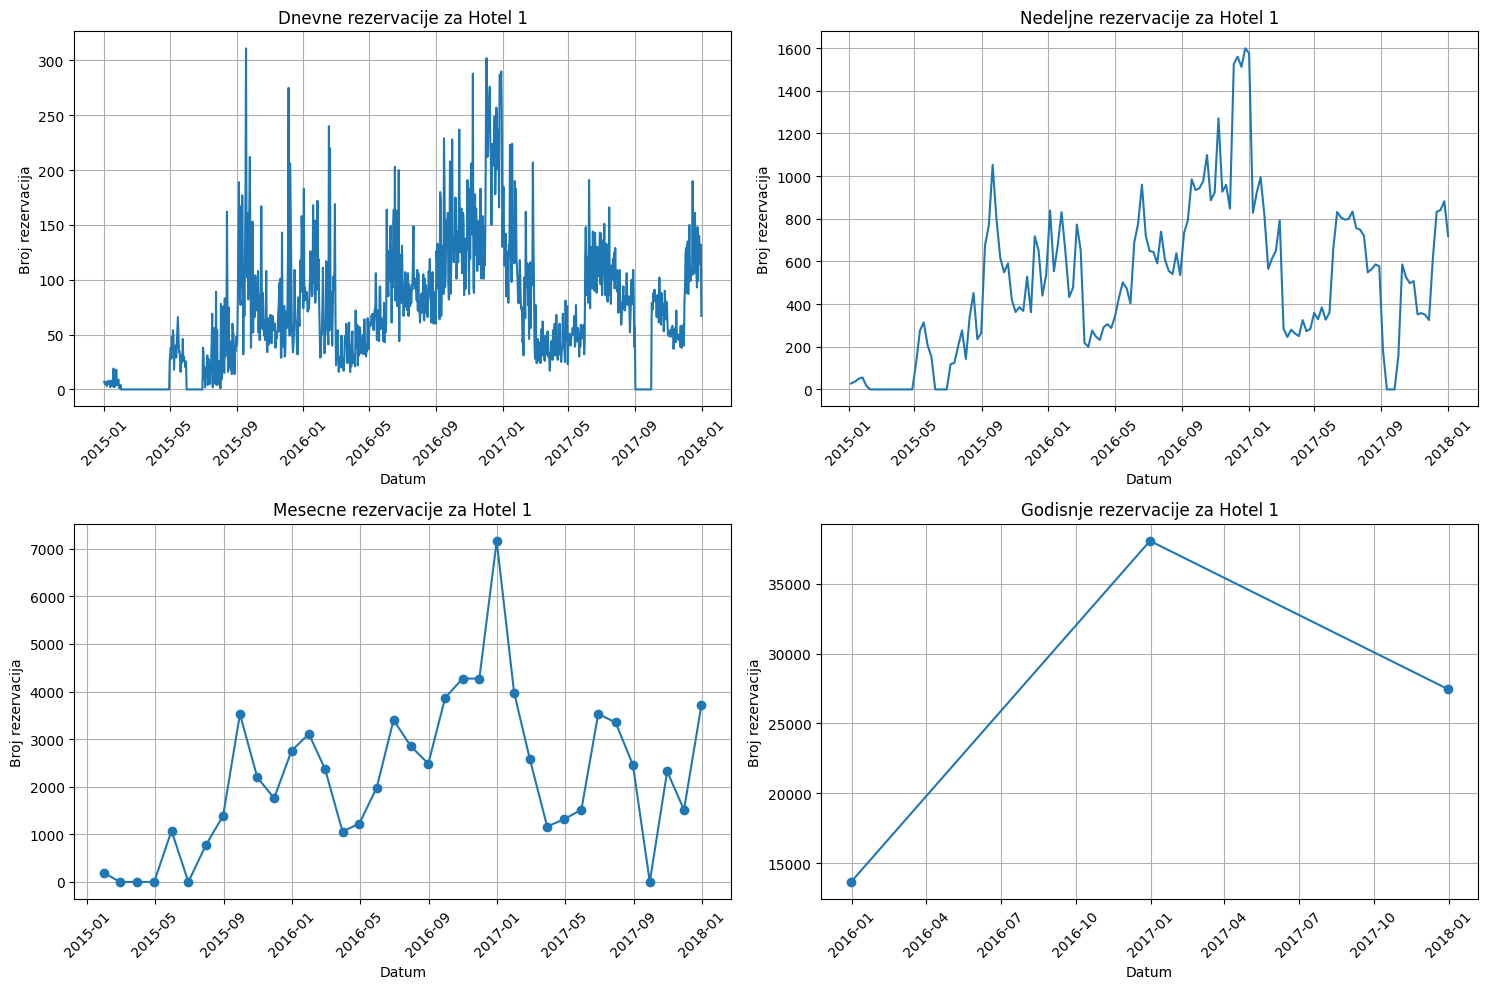

In [26]:
visualize_reservations_by_time(df, 1)

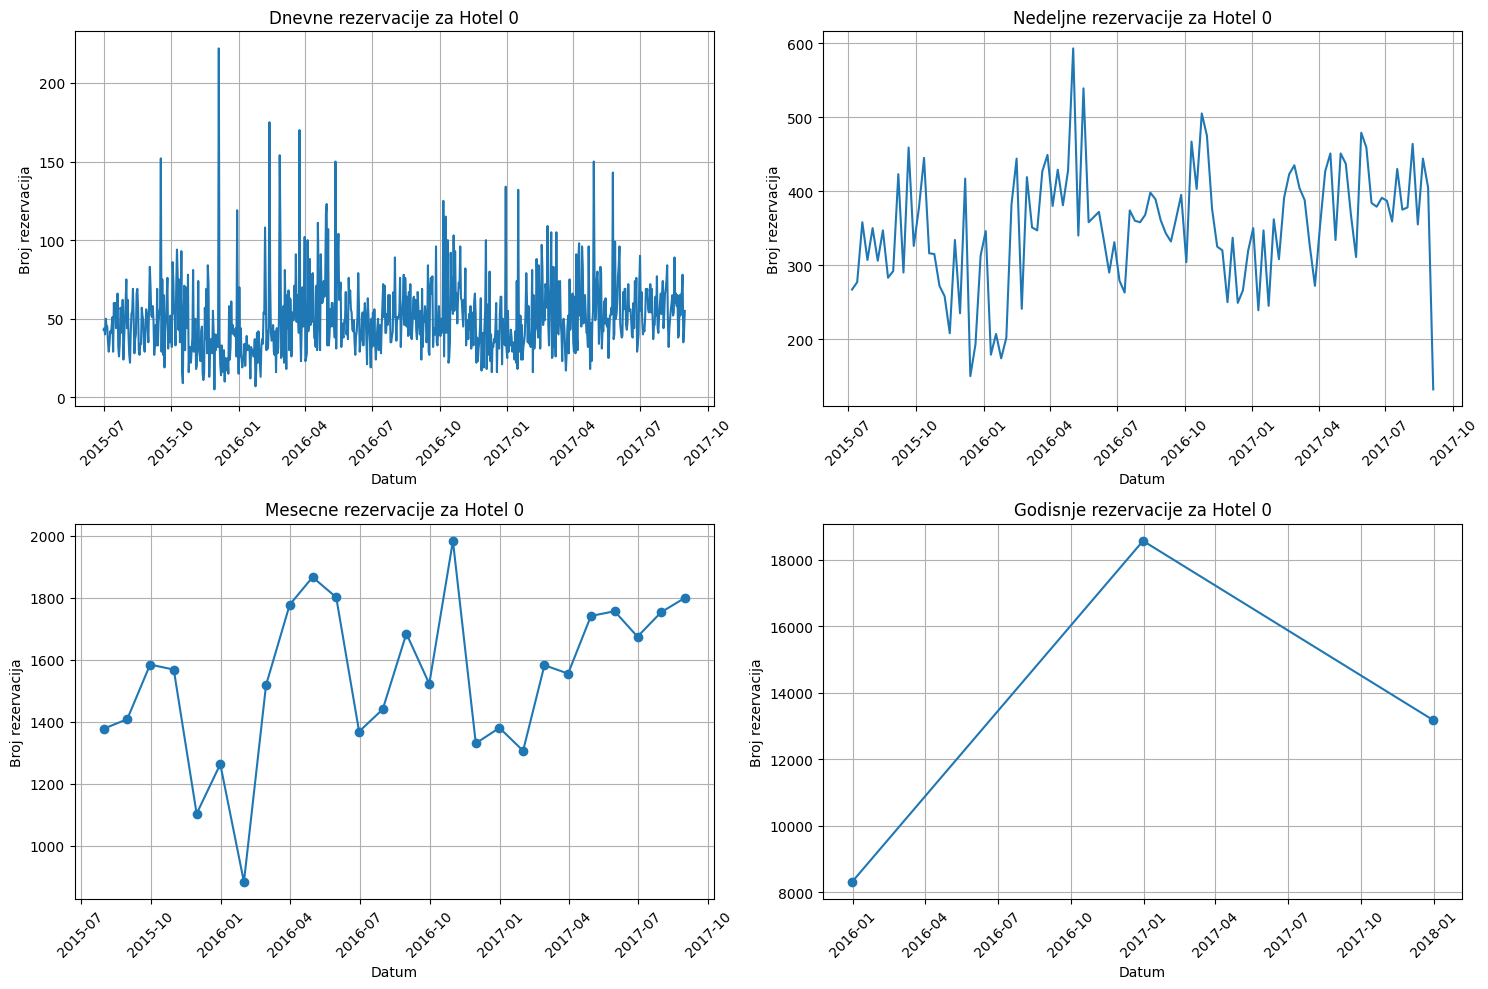

In [27]:
visualize_reservations_by_time(df, 0)

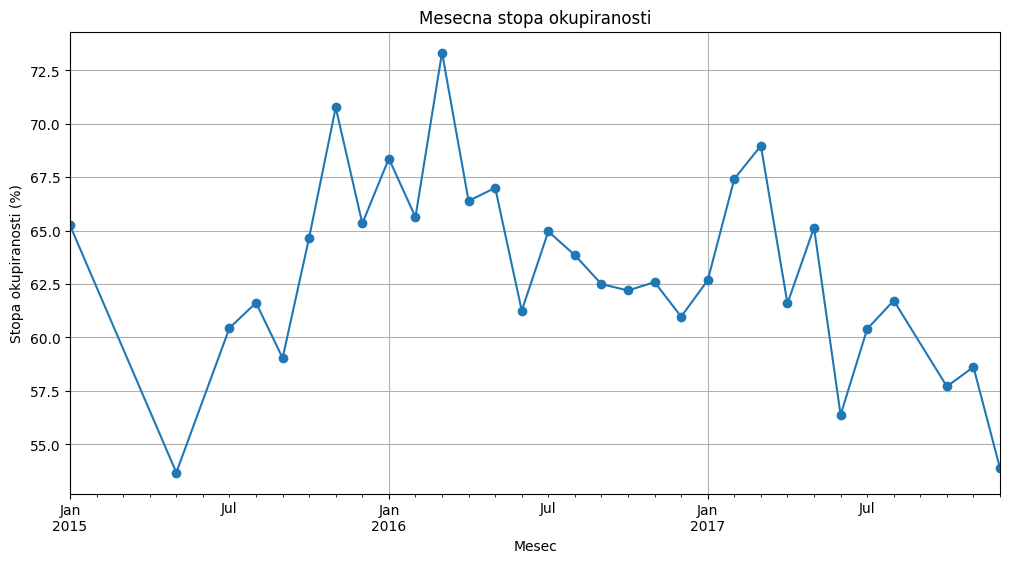

In [28]:
occupancy_data = df.groupby(df['datum_dolaska'].dt.to_period("M"))['status_rezervacije_Check-Out'].sum() / df.groupby(df['datum_dolaska'].dt.to_period("M"))['rezervacija_id'].count() * 100
# ovo je zapravo procenat checkouta u odnosu na sve, mada ima neke vrednosti od ovoga
plt.figure(figsize=(12, 6))
occupancy_data.plot(kind='line', marker='o')
plt.title('Mesecna stopa okupiranosti')
plt.xlabel('Mesec')
plt.ylabel('Stopa okupiranosti (%)')
plt.grid(True)
plt.show()

In [29]:
df = pd.read_parquet("export_df.parquet")

Procentualno statusi rezervacije
status_rezervacije
Canceled     36.064927
Check-Out    62.923412
No-Show       1.011660
dtype: float64


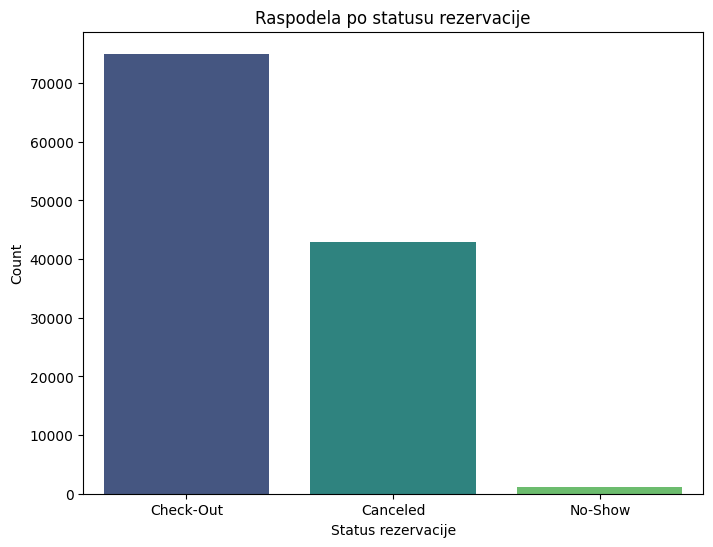

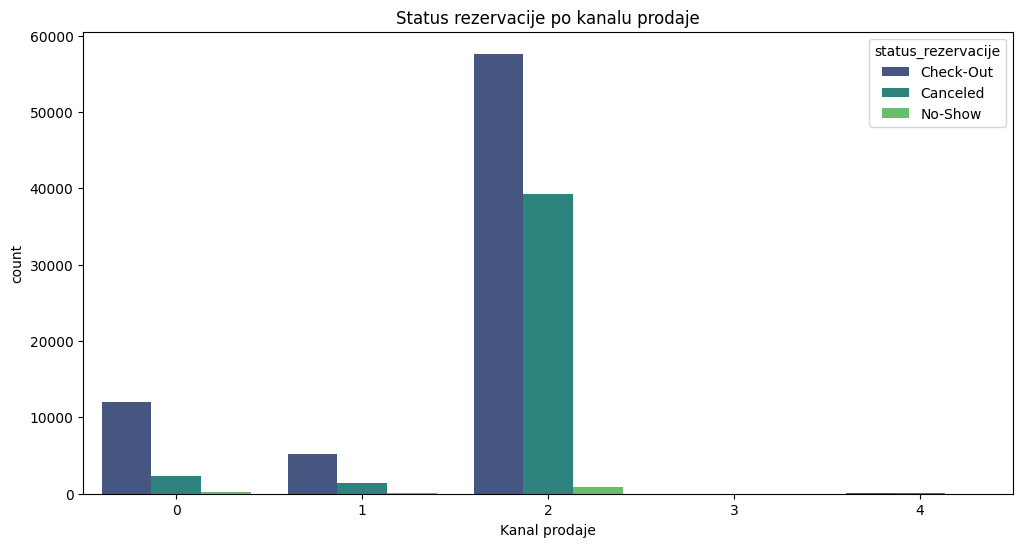

In [30]:
cancellation_by_status = df.groupby('status_rezervacije').size()
total_reservations = len(df)

cancellation_rates = cancellation_by_status / total_reservations * 100

print("Procentualno statusi rezervacije")
print(cancellation_rates)

plt.figure(figsize=(8, 6))
sns.countplot(x='status_rezervacije', data=df, palette='viridis')
plt.title('Raspodela po statusu rezervacije')
plt.xlabel('Status rezervacije')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='kanal_prodaje_id', hue='status_rezervacije', data=df, palette='viridis')
plt.title('Status rezervacije po kanalu prodaje')
plt.xlabel('Kanal prodaje')
plt.show()

Broj ponavljajucih rezervacija (tj rezervacija od istih ljudi): 11287
Prosecan broj rezervacija po ponavljacu (smesno ime): 2.0561708159829895


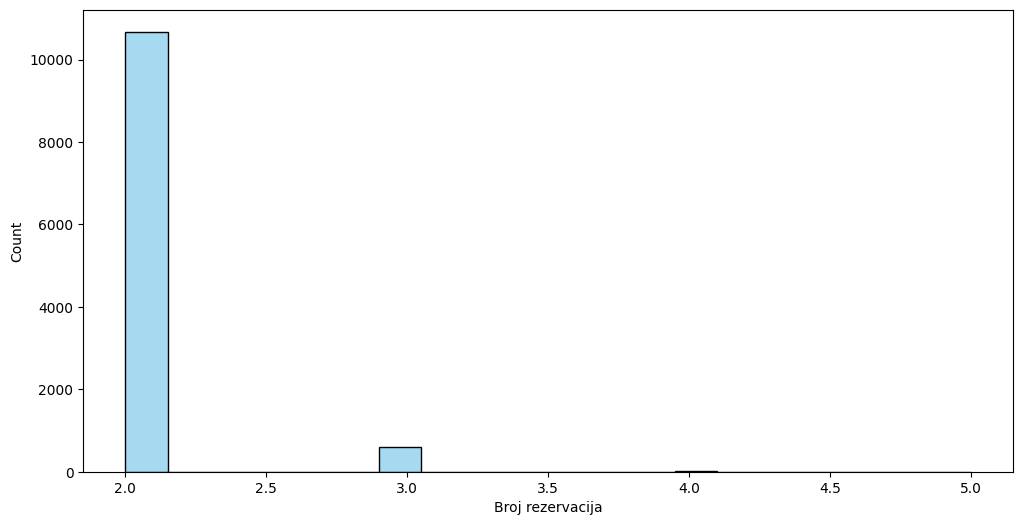

In [31]:
repeat_guests = df[df.duplicated(subset='gost_id', keep=False)]


repeat_bookings = repeat_guests.groupby('gost_id').size()

print("Broj ponavljajucih rezervacija (tj rezervacija od istih ljudi):", len(repeat_bookings))
print("Prosecan broj rezervacija po ponavljacu (smesno ime):", repeat_bookings.mean())

plt.figure(figsize=(12, 6))
sns.histplot(repeat_bookings, bins=20, color='skyblue')
plt.xlabel('Broj rezervacija')
plt.show()

In [32]:
df['broj_gostiju'] = df['broj_djece_gostiju'] + df['broj_odraslih_gostiju']

In [33]:
max_guests_by_room_type = df.groupby('tip_sobe_id')['broj_gostiju'].max()

print(max_guests_by_room_type)

tip_sobe_id
0     5.0
1    55.0
2    20.0
3    10.0
4     5.0
5     5.0
6     5.0
7     4.0
8     5.0
Name: broj_gostiju, dtype: float64


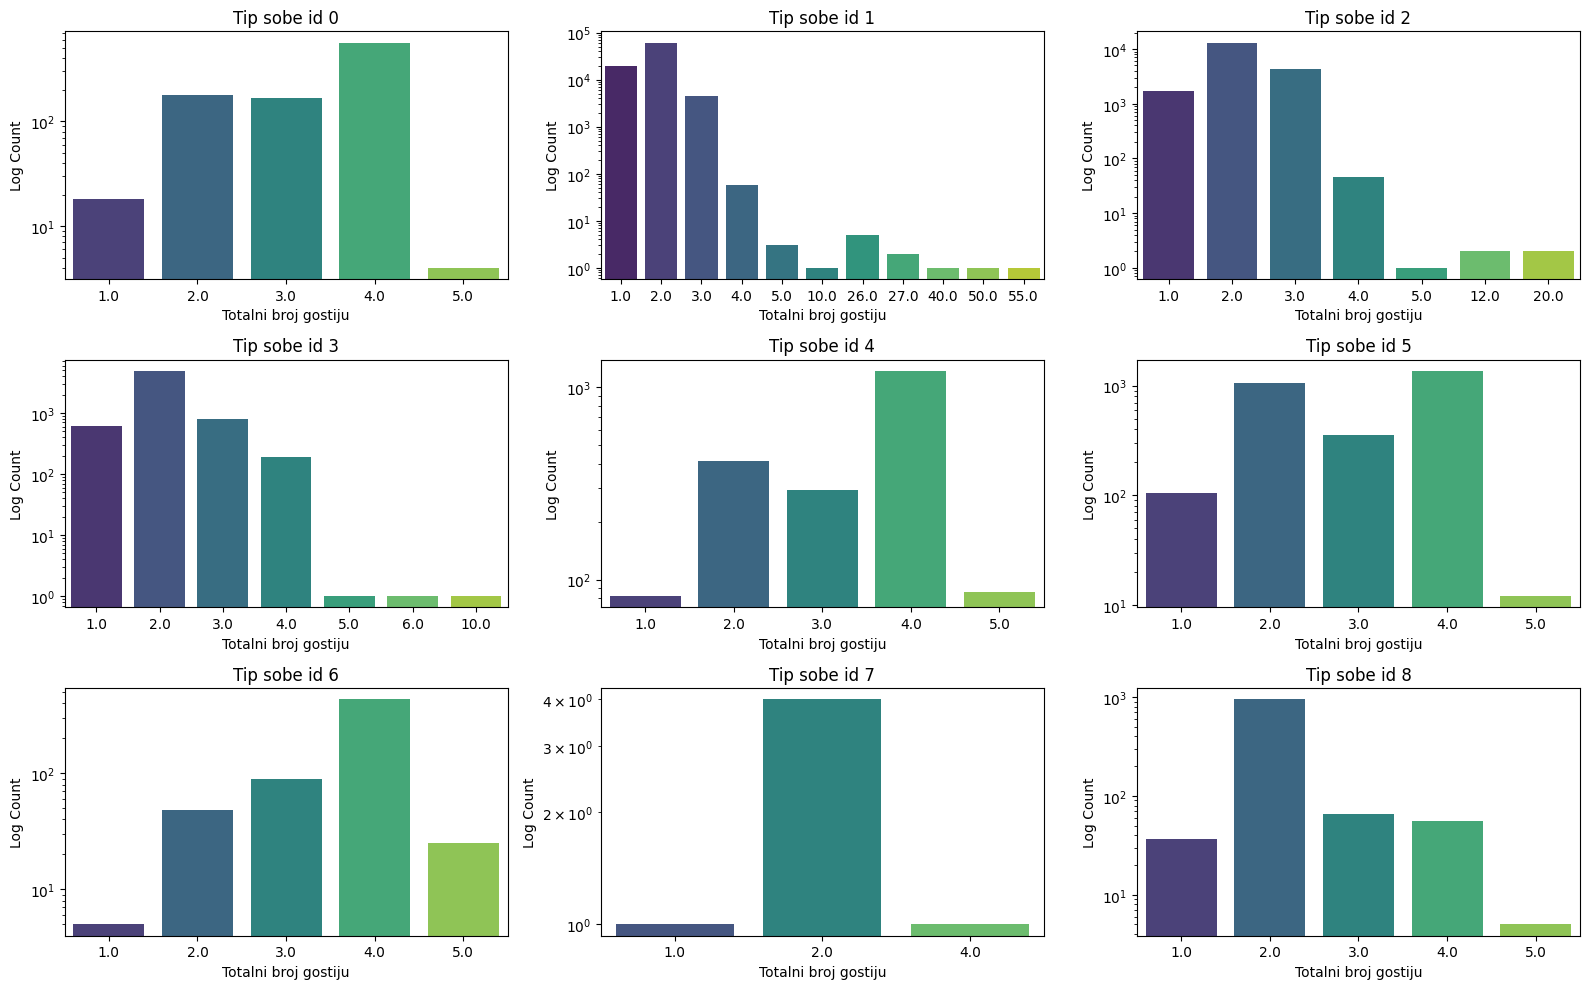

In [34]:
plt.figure(figsize=(16, 10))
for room_type, data in df.groupby('tip_sobe_id'):
    plt.subplot(3, 3, room_type+1)  
    sns.countplot(x='broj_gostiju', data=data, palette='viridis')
    plt.yscale('log')  
    plt.title(f'Tip sobe id {room_type}')
    plt.xlabel('Totalni broj gostiju')
    plt.ylabel('Log Count')

plt.tight_layout()
plt.show()